# Week2 授業前課題1 小麦とチェス盤問題

## 2.小麦とチェス盤問題

## 3.少ないマスで考える

In [219]:
# サンプルコード（リスト）
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [220]:
# サンプルコード （np）
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


### 【問題1】2×2マスのチェス盤の小麦の数

In [221]:
# リストのshapeの変形を行う
reshaped_bord_ndarray = small_board_ndarray.reshape(2,2)
print("2×2マスの板に小麦を並べる（ndarray）：\n{}".format(reshaped_bord_ndarray))

2×2マスの板に小麦を並べる（ndarray）：
[[1 2]
 [4 8]]


## 4.8×8マスのチェス盤

### 【問題2】n×mマスへの拡張

In [222]:
import numpy as np

# n*mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成

def board_wheat(n_squares):
    n_squares = vertical_axis*horizontal_axis
    board_wheat_list = [1]
    for _ in range(n_squares-1):
        board_wheat_list.append(2*board_wheat_list[-1])
        board_wheat_ndarray = np.array(board_wheat_list).astype('uint64')
    return board_wheat_ndarray.reshape(vertical_axis,horizontal_axis)

# 8*8マスのチェス盤の小麦の数を求める
vertical_axis = 8
horizontal_axis = 8

print("{}×{}マスのチェス盤の小麦の数：\n{}".format(vertical_axis,horizontal_axis,board_wheat(n_squares)))

8×8マスのチェス盤の小麦の数：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664   

### 【問題3】小麦の数の合計

8×8マスのチェス盤の小麦の数：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664   

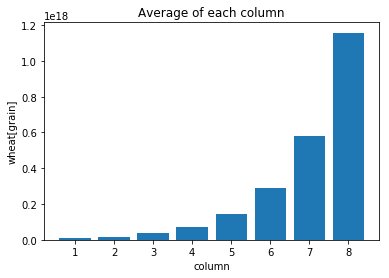

In [223]:
# 棒グラフのサンプルコード

import matplotlib.pyplot as plt
%matplotlib inline

# 関数を使って8*8マスのチェス盤の小麦の数を求める
vertical_axis = 8
horizontal_axis = 8

print("{}×{}マスのチェス盤の小麦の数：\n{}".format(vertical_axis,horizontal_axis,board_wheat(n_squares)))

# 各列の平均値を求める

board_wheat_list = board_wheat(n_squares)
each_array_average = board_wheat_list.mean(axis=0)

print("各列の小麦の平均（粒）\n{}".format(board_wheat_list.mean(axis=0)))

# 各列の平均をグラフに表す

plt.xlabel("column")
plt.ylabel("wheat[grain]")
plt.title("Average of each column")
plt.bar(np.arange(1,horizontal_axis + 1), each_array_average)
plt.show()

### 【問題4】小麦の数のヒートマップ

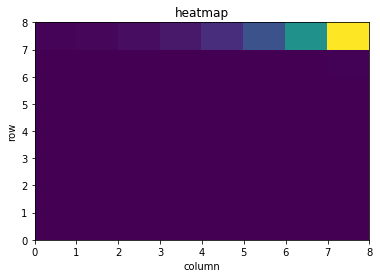

In [224]:
vertical_axis = 8
horizontal_axis = 8

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")

#plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.pcolor(board_wheat(n_squares))
plt.show()

## 5.チェス盤の後半

### 【問題5】後半は前半の何倍か

In [225]:
vertical_axis = 8
horizontal_axis = 8

# 前半と後半の小麦の数のリスト
first_half = board_wheat(n_squares)[:4,:]
second_half = board_wheat(n_squares)[4:,:] 

# 前半、後半の小麦のそれぞれの合計を求める
total_first_half = sum(first_half.sum(axis=1)) # 各行の合計をさらに合計
total_second_half = sum(second_half.sum(axis=1)) # 各行の合計をさらに合計
times = total_first_half/total_second_half # 前半を後半で割る
print("前半の小麦の合計は{}粒".format(int(total_first_half)))
print("後半の小麦の合計は{}粒".format(int(total_second_half)))
print("後半の小麦の数は前半の{}倍".format(times))

前半の小麦の合計は4294967295粒
後半の小麦の合計は18446744069414584320粒
後半の小麦の数は前半の2.3283064365386963e-10倍


## 6.他の計算方法

In [226]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


### 【問題6】他の計算方法によるn×mマスへの拡張

In [243]:
# np.append()

def wheat_append(n_squares):
    n_squares = vertical_axis*horizontal_axis
    board_ndarray = np.array([1])
    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1]).astype("uint64")
    return board_ndarray.reshape(vertical_axis,horizontal_axis)

vertical_axis = 8
horizontal_axis = 8
print("{}×{}マスのチェス盤の小麦の数（np.append())：\n{}".format(vertical_axis,horizontal_axis,wheat_append(n_squares)))

# ブロードキャスト

def wheat_broad(n_squares):
    n_squares = vertical_axis*horizontal_axis
    indices_of_squares = np.arange(n_squares) # マス目のインデックスリストを用意
    board_ndarray = 2**indices_of_squares # マス目のインデックス数に２乗する
    return board_ndarray.reshape(vertical_axis,horizontal_axis)

vertical_axis = 8
horizontal_axis = 8

print("{}×{}マスのチェス盤の小麦の数（ブロードキャスト）\n：{}".format(vertical_axis,horizontal_axis,wheat_broad(n_squares)))

8×8マスのチェス盤の小麦の数（np.append())：
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036

### 【問題7】計算時間の比較

In [254]:
%%timeit
vertical_axis = 8
horizontal_axis = 8
board_wheat(n_squares)
# for文

227 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [250]:
%%timeit
vertical_axis = 8
horizontal_axis = 8
wheat_append(n_squares)
# np.append()

463 µs ± 9.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [252]:
%%timeit
vertical_axis = 8
horizontal_axis = 8
wheat_broad(n_squares)
# ブロードキャスト

2.28 µs ± 78.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
